##### Importing all the liberaries required

In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [2]:
# importing dataset
hand_digit_recog = pd.read_csv("train.csv")
hand_digit_recog.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
hand_digit_recog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
hand_digit_recog.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [5]:
#checking the number of columns in the given dataset.....
len(hand_digit_recog.columns)

785

since there are a lot of columns it looks like 785 to be exact; now we can confirm that the columns pixel values right from 0 to 783 and there columns like serial number and pixels.

In [6]:
hand_digit_recog.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
#lets try to make the reason with the dataset; lets look at what actaully is there; lets try to get the first row and try to visualise it
zero = hand_digit_recog.iloc[1,1:]
zero.shape

(784,)

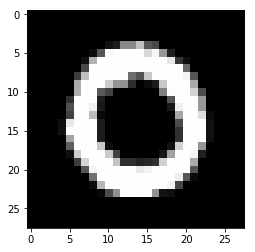

In [8]:
#reshapig and getting the image printed with all the pixels into a grid of 28X28 pixels.... as shown below
zero = zero.values.reshape(28, 28)
plt.imshow(zero, cmap='gray')


In [9]:
hand_digit_recog.shape

(42000, 785)

##### could have portriated the heatmap and all means and all, but since the dataset is qiute heavy looking at the shape of it, its scary huge, so skpipping that and continuing with other summarising and all

In [10]:
#looking up for the categorical labels in the data set
cat_count = hand_digit_recog.label.astype('category').value_counts()

In [11]:
# looking at the percentage of the categorical data
(round(cat_count/len(hand_digit_recog.index), 4))*100

1    11.15
7    10.48
3    10.36
9     9.97
2     9.95
6     9.85
0     9.84
4     9.70
8     9.67
5     9.04
Name: label, dtype: float64

In [12]:
#checking the dataset for any missing values...
hand_digit_recog.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

###### looks like there are no missing values,,,,,, thats super:)

## Data preparation step

SInce there is quite a lot of data as mentioned earleir looking at the shape of it, we are supposed to make ready the data, else it will take days to build a model using this...


In [13]:
# TEST Train creation by splitting it using following 
X = hand_digit_recog.iloc[:, 1:] #skipping the 1st entry

Y = hand_digit_recog.iloc[:, 0]


#Scaling of features
from sklearn.preprocessing import scale

X = scale(X)


#Test Train split using the ablove statements; splitting it with 20% train data; since the data is huge we are using only 20% of it.
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.20, random_state=100)

C:\Anaconda_3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [14]:
x_train.shape

(8400, 784)

## Model Building using the above prepared data

First building the Linear model using the hyperparameters


##### Linear Model -- next

In [15]:
from sklearn import metrics
from sklearn import svm

#linear kernel to be used 
Lin_SVM = svm.SVC(kernel='linear')

Lin_SVM.fit(x_train, y_train)
# fitting it too...

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
# as fit, we are going for prediction staright forward
y_prediction = Lin_SVM.predict(x_test)
y_prediction[:10]

array([5, 0, 2, 7, 7, 9, 4, 3, 5, 3], dtype=int64)

In [17]:
# here is the measure to be calculated -- i.e. the accuracy to tally amoung the models
metrics.accuracy_score(y_true=y_test, y_pred=y_prediction)

0.9106845238095238

##### Non-Linear Model

Going next with the non linear SVM model using 'rbf' kernel


In [18]:
#modeling 
NonLin_SVM = svm.SVC(kernel='rbf')
NonLin_SVM.fit(x_train, y_train)
#fitting done right............

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
#testing the model, over the test set;  predcting further
y_prediction = NonLin_SVM.predict(x_test)

In [21]:
# accuracy for the nonlinear model..............
metrics.accuracy_score(y_true=y_test, y_pred=y_prediction)

0.9340773809523809

In [23]:
#trying to get rid of garbage objects using this library to make things go faster.... as it takes a lot of time to process and i have a low config machine:()
import gc
gc.collect()

0

#### Grid Search tuning............... is next

In [24]:
# creating a KFold object with 5 splits 
#gc.collect()
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)
n_jobs=-1


hyper_params = {'C':[1], 
             'gamma': [0.001]}


#hyper_params = {'C':[1, 10, 100], 
#             'gamma': [0.01, 0.001,0.0001]}

# specifying the model
model = SVC(kernel="rbf")

# set up the GridSearchCV()
model_cv = GridSearchCV(estimator = model, param_grid = hyper_params, scoring= 'accuracy', cv = folds, 
                        verbose = 1,return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 11.8min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1], 'gamma': [0.001]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=1)

In [25]:
# results being shown below.......
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,56.248252,1.361143,17.16701,0.346418,1,0.001,"{'C': 1, 'gamma': 0.001}",0.934524,0.932738,0.942857,...,0.935238,0.003973,1,0.975298,0.974256,0.975,0.974554,0.975446,0.974911,0.000447


#### Finally going for the final model


In [27]:
#Choosing the below mentioned values as the optimal ones,.....
C_value = 1
gamma_value = 0.001

#modeling it to the best ones i.e. the non linear one from above observation as they have the best accurancey....
final_SVM = svm.SVC(kernel='rbf', C=C_value, gamma=gamma_value)

#fitting model
final_SVM.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
# read the dataset
final_testing_digit_recog = pd.read_csv("test.csv")
final_testing_digit_recog.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [29]:
#well predeicting the final set..........
y_prediction = final_SVM.predict(final_testing_digit_recog)

In [30]:
#final shape of the predcited set
y_prediction.shape

(28000,)

In [31]:
final_result = pd.DataFrame({'Label': y_prediction})
final_result.head()

,Label
0,2
1,2
2,2
3,2
4,2


In [32]:
#looks like it works...................

###### some of the cells may not be with outputs,,,, as the system is woring quite slow and i have done some corrections and rebuilding them takes a lot of time, due to time constrains, i may not be able to make it through, please run the solution at your end and then evaluate, you must have a better machine than me, please do not deduct marks based on that; i hope request is understood; thanks:) 